In [334]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tqdm import tqdm

### Clean Data

In [335]:
df = pd.read_excel('VOC-ALS-CLEANED.xlsx')

In [336]:
print(df.shape) 
df.head()# note that first row is what should be the column names

(154, 89)


,Column-1,Column-2,Column-3,Column-4,Column-5,Column-6,Column-7,Column-8,Column-9,Column-10,...,Column-80,Column-81,Column-82,Column-83,Column-84,Column-85,Column-86,Column-87,Column-88,Column-89
0,ID,Age (years),Sex,Category,OnsetRegion,Therapy,GeneticTest,DiagnosticDelay,DiseaseDuration,FVC%,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,CT001,56,F,HC,-,-,-,-,-,-,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,CT004,72,F,HC,-,-,-,-,-,-,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,CT010,60,F,HC,-,-,-,-,-,-,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,CT013,64,F,HC,-,-,-,-,-,-,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12


In [337]:
# set column names as first row
rename_map = dict([(old_name, new_name) for old_name, new_name in zip(df.axes[1], list(df.iloc[0]))])
renamed_df = df.rename(rename_map, axis=1)
renamed_df.head()

,ID,Age (years),Sex,Category,OnsetRegion,Therapy,GeneticTest,DiagnosticDelay,DiseaseDuration,FVC%,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
0,ID,Age (years),Sex,Category,OnsetRegion,Therapy,GeneticTest,DiagnosticDelay,DiseaseDuration,FVC%,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,CT001,56,F,HC,-,-,-,-,-,-,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,CT004,72,F,HC,-,-,-,-,-,-,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,CT010,60,F,HC,-,-,-,-,-,-,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,CT013,64,F,HC,-,-,-,-,-,-,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12


In [338]:
# remove diagnostic/treatments stuff as no values for healthy participants and first row (which held the column names)
clean_df = pd.concat([renamed_df.iloc[:,1:4], renamed_df.iloc[:,33:]], axis=1)[1:]
clean_df.head()

,Age (years),Sex,Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,56,F,HC,178.215501,1.780023,17.101148,0.003917,0.10771,188.704803,5.102617,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,72,F,HC,184.581568,4.82997,23.711906,0.003241,0.037427,186.589774,6.743713,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,60,F,HC,138.06451,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,64,F,HC,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12
5,62,F,HC,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,...,36.952328,14.039653,0.026335,0.103564,184.407533,30.29664,13.52561,0.028864,0.123836,3


In [339]:
# Convert category (ALS or HC) to binary so don't have to predict a string lol
binary_target = clean_df["Category"] == "ALS"
clean_df["Category"] = binary_target
clean_df.head()

,Age (years),Sex,Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,56,F,False,178.215501,1.780023,17.101148,0.003917,0.10771,188.704803,5.102617,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,72,F,False,184.581568,4.82997,23.711906,0.003241,0.037427,186.589774,6.743713,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,60,F,False,138.06451,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,64,F,False,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12
5,62,F,False,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,...,36.952328,14.039653,0.026335,0.103564,184.407533,30.29664,13.52561,0.028864,0.123836,3


In [340]:
# One-hot encode gender
is_male = clean_df["Sex"] == "M"
clean_df["gender_male"] = is_male.astype(int)
clean_df["gender_female"] = 1 - is_male
clean_df = clean_df.drop(columns="Sex")
clean_df.head()

,Age (years),Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,HNR_E,...,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire,gender_male,gender_female
1,56,False,178.215501,1.780023,17.101148,0.003917,0.10771,188.704803,5.102617,15.753448,...,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7,0,1
2,72,False,184.581568,4.82997,23.711906,0.003241,0.037427,186.589774,6.743713,24.135282,...,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0,0,1
3,60,False,138.06451,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,7.932193,...,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22,0,1
4,64,False,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,20.197039,...,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12,0,1
5,62,False,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,20.652874,...,0.026335,0.103564,184.407533,30.29664,13.52561,0.028864,0.123836,3,0,1


In [341]:
# Make sure all columns are numeric so we can display them
for name in clean_df.columns:
    clean_df[name] = pd.to_numeric(clean_df[name], errors='coerce')

### EDA

In [342]:
clean_df.head()

,Age (years),Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,HNR_E,...,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire,gender_male,gender_female
1,56,False,178.215501,1.780023,17.101148,0.003917,0.107710,188.704803,5.102617,15.753448,...,0.023379,0.113960,167.768436,15.147806,14.020984,0.017668,0.112806,7,0,1
2,72,False,184.581568,4.829970,23.711906,0.003241,0.037427,186.589774,6.743713,24.135282,...,0.013030,0.068701,195.725146,25.969098,19.756000,0.011523,0.059758,0,0,1
3,60,False,138.064510,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,7.932193,...,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22,0,1
4,64,False,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,20.197039,...,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12,0,1
5,62,False,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,20.652874,...,0.026335,0.103564,184.407533,30.296640,13.525610,0.028864,0.123836,3,0,1


In [343]:
# what proportion of examples are positive
num_positive = sum(clean_df["Category"])
print(f"{num_positive} / {len(clean_df)} =  {num_positive / len(clean_df)}")

102 / 153 =  0.6666666666666666


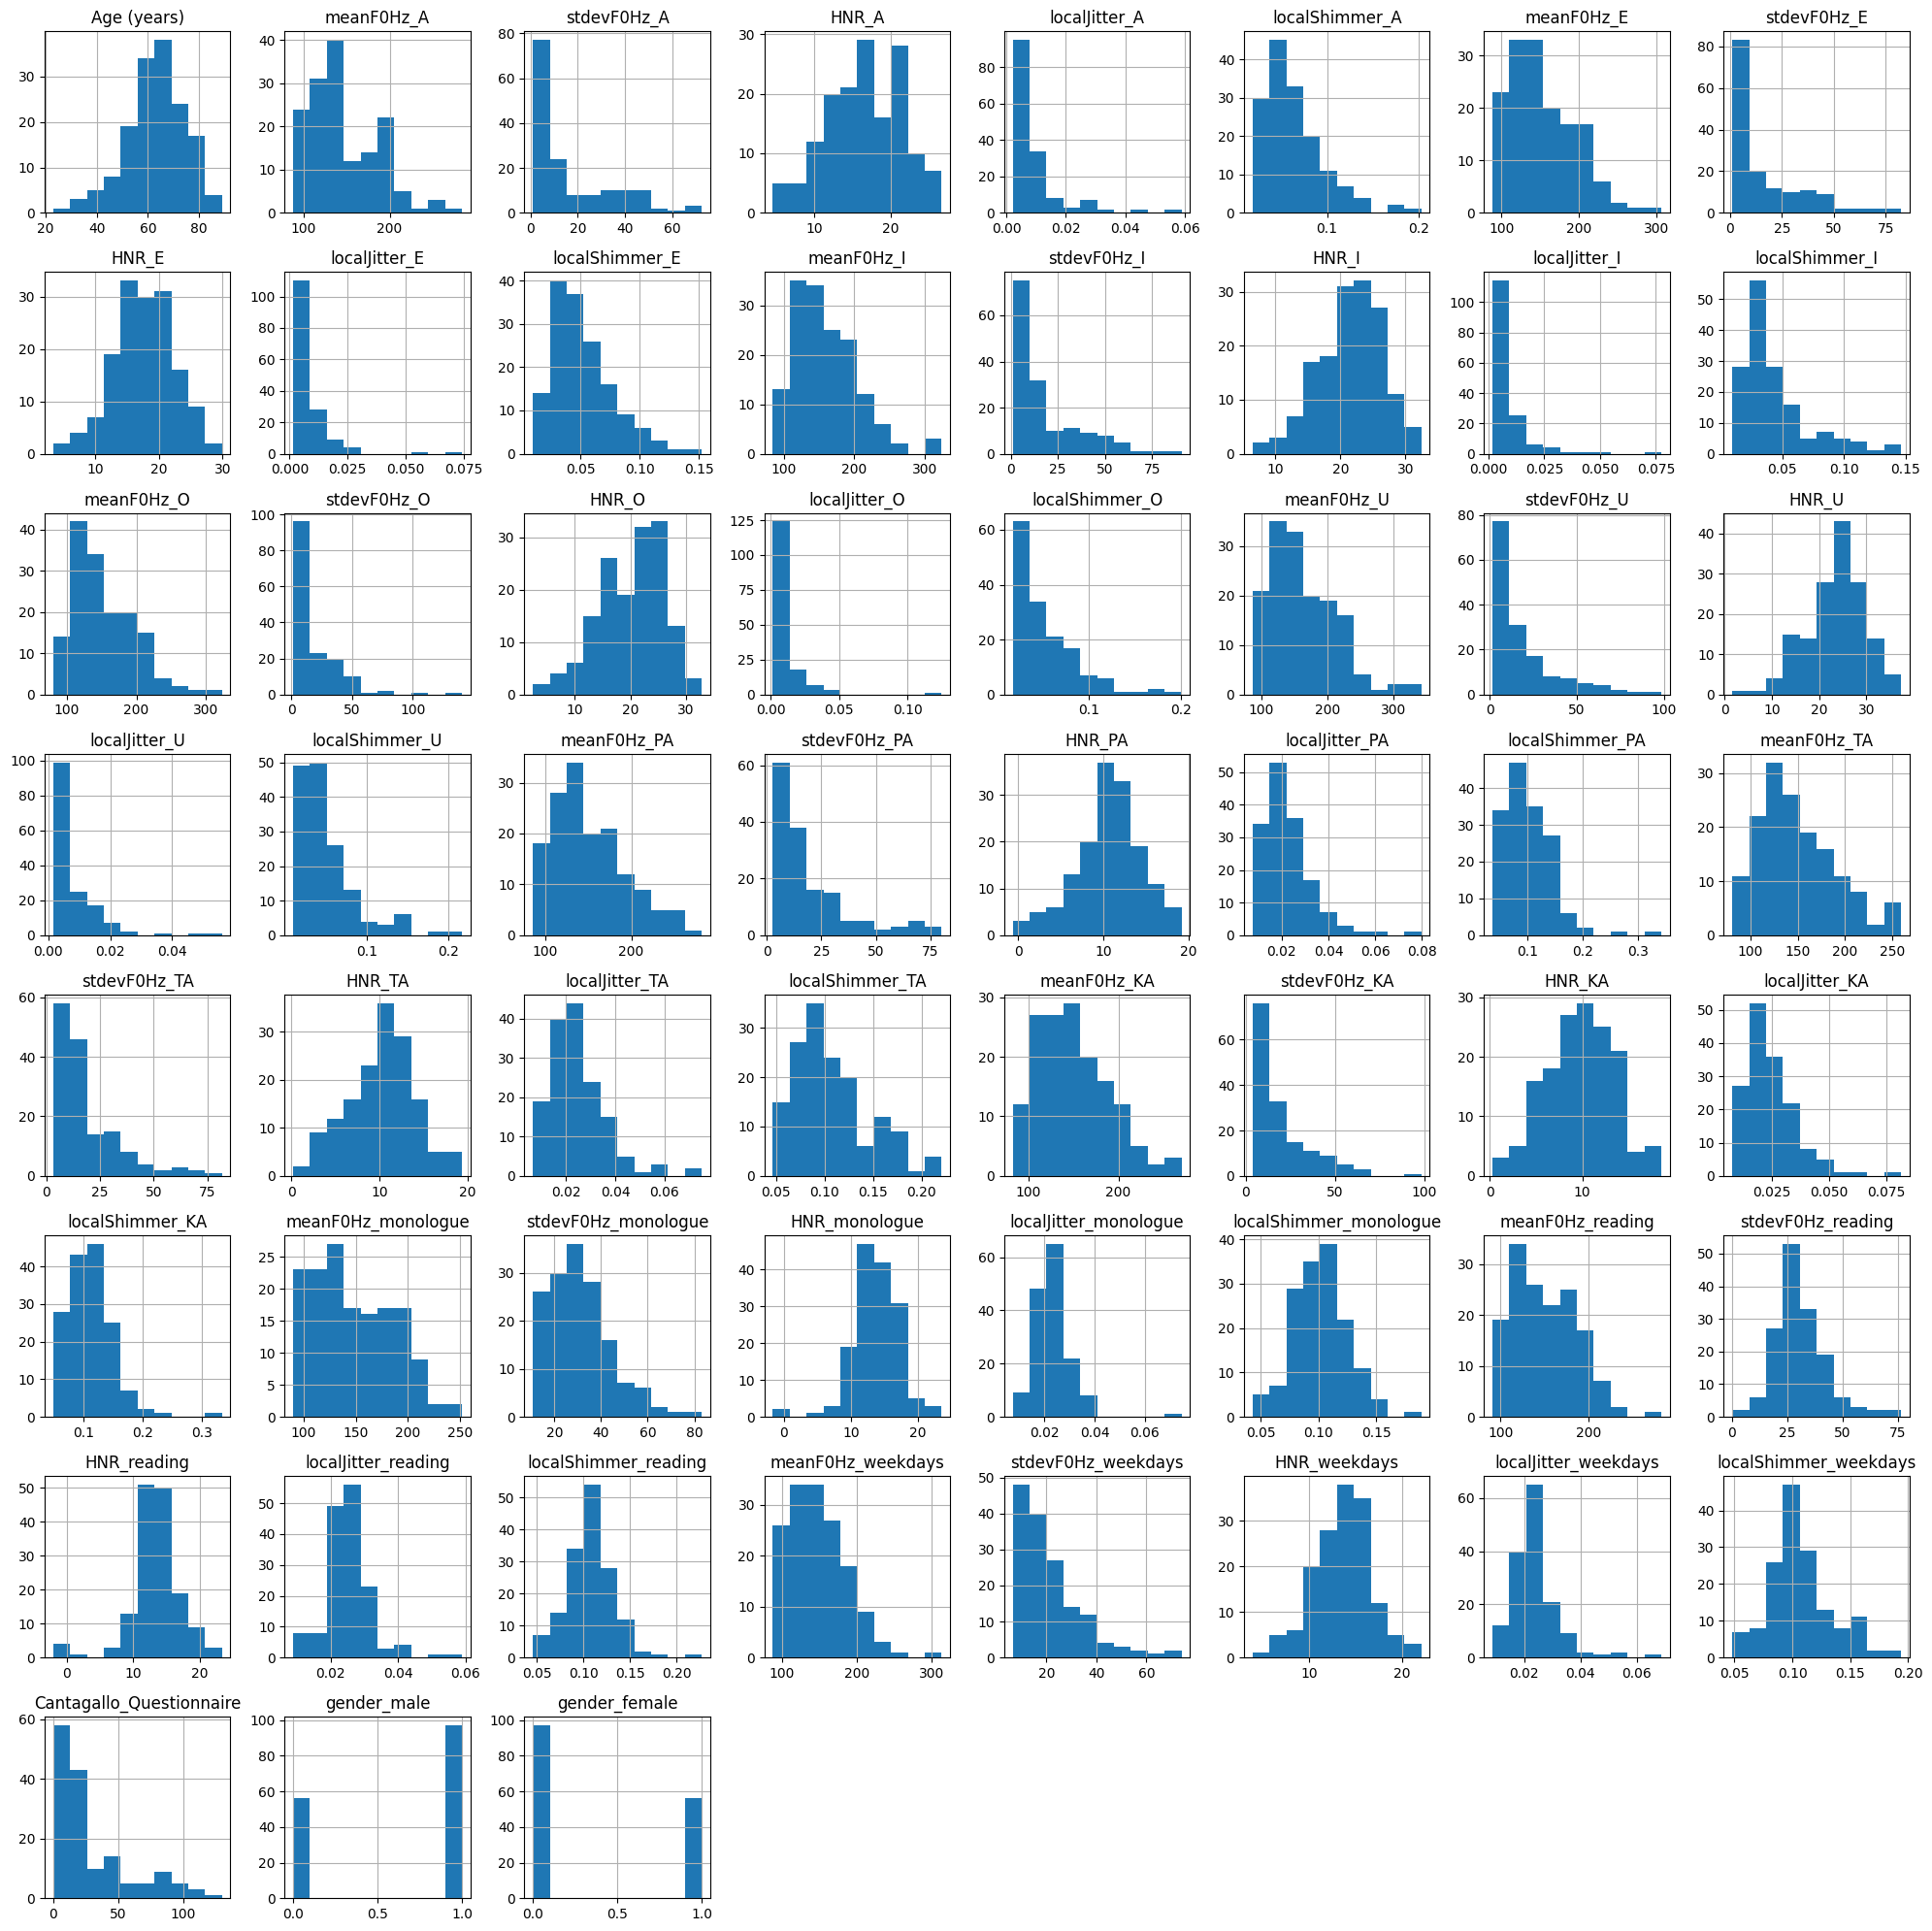

In [344]:
clean_df.hist(figsize=(20,20))
plt.tight_layout()

In [345]:
nan_counts_per_column = clean_df.isna().sum()
print(nan_counts_per_column)

Age (years)                 0
Category                    0
meanF0Hz_A                  0
stdevF0Hz_A                 0
HNR_A                       0
localJitter_A               0
localShimmer_A              0
meanF0Hz_E                  0
stdevF0Hz_E                 0
HNR_E                       0
localJitter_E               0
localShimmer_E              0
meanF0Hz_I                  0
stdevF0Hz_I                 0
HNR_I                       0
localJitter_I               0
localShimmer_I              0
meanF0Hz_O                  0
stdevF0Hz_O                 0
HNR_O                       0
localJitter_O               0
localShimmer_O              0
meanF0Hz_U                  0
stdevF0Hz_U                 0
HNR_U                       0
localJitter_U               0
localShimmer_U              0
meanF0Hz_PA                 0
stdevF0Hz_PA                0
HNR_PA                      0
localJitter_PA              0
localShimmer_PA             0
meanF0Hz_TA                 0
stdevF0Hz_

### Preprocessing

In [346]:
# get each column name so I don't have to type them all
for name in clean_df.columns:
    print(f"\"{name}\", ", end="")

"Age (years)", "Category", "meanF0Hz_A", "stdevF0Hz_A", "HNR_A", "localJitter_A", "localShimmer_A", "meanF0Hz_E", "stdevF0Hz_E", "HNR_E", "localJitter_E", "localShimmer_E", "meanF0Hz_I", "stdevF0Hz_I", "HNR_I", "localJitter_I", "localShimmer_I", "meanF0Hz_O", "stdevF0Hz_O", "HNR_O", "localJitter_O", "localShimmer_O", "meanF0Hz_U", "stdevF0Hz_U", "HNR_U", "localJitter_U", "localShimmer_U", "meanF0Hz_PA", "stdevF0Hz_PA", "HNR_PA", "localJitter_PA", "localShimmer_PA", "meanF0Hz_TA", "stdevF0Hz_TA", "HNR_TA", "localJitter_TA", "localShimmer_TA", "meanF0Hz_KA", "stdevF0Hz_KA", "HNR_KA", "localJitter_KA", "localShimmer_KA", "meanF0Hz_monologue", "stdevF0Hz_monologue", "HNR_monologue", "localJitter_monologue", "localShimmer_monologue", "meanF0Hz_reading", "stdevF0Hz_reading", "HNR_reading", "localJitter_reading", "localShimmer_reading", "meanF0Hz_weekdays", "stdevF0Hz_weekdays", "HNR_weekdays", "localJitter_weekdays", "localShimmer_weekdays", "Cantagallo_Questionnaire", "gender_male", "gender

(x - mu) / sd

In [347]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# numeric features that need standardizing
numeric_features = ["Age (years)", "meanF0Hz_A", "stdevF0Hz_A", "HNR_A", "localJitter_A", "localShimmer_A", "meanF0Hz_E", "stdevF0Hz_E", "HNR_E", "localJitter_E", "localShimmer_E", "meanF0Hz_I", "stdevF0Hz_I", "HNR_I", "localJitter_I", "localShimmer_I", "meanF0Hz_O", "stdevF0Hz_O", "HNR_O", "localJitter_O", "localShimmer_O", "meanF0Hz_U", "stdevF0Hz_U", "HNR_U", "localJitter_U", "localShimmer_U", "meanF0Hz_PA", "stdevF0Hz_PA", "HNR_PA", "localJitter_PA", "localShimmer_PA", "meanF0Hz_TA", "stdevF0Hz_TA", "HNR_TA", "localJitter_TA", "localShimmer_TA", "meanF0Hz_KA", "stdevF0Hz_KA", "HNR_KA", "localJitter_KA", "localShimmer_KA", "meanF0Hz_monologue", "stdevF0Hz_monologue", "HNR_monologue", "localJitter_monologue", "localShimmer_monologue", "meanF0Hz_reading", "stdevF0Hz_reading", "HNR_reading", "localJitter_reading", "localShimmer_reading", "meanF0Hz_weekdays", "stdevF0Hz_weekdays", "HNR_weekdays", "localJitter_weekdays", "localShimmer_weekdays", "Cantagallo_Questionnaire"]  # numerical columns
onehot_features = ["Category", 'gender_male', 'gender_female'] # no touchy

# Want to normalize numeric features (not ALS diagnosis, or one hot encoded gender)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', onehot_features)  # leave these as-is
    ]
)

p = Pipeline(steps=[
    ('preprocessor', preprocessor)])

scaled_data = p.fit_transform(clean_df)

# Convert back to DataFrame
feature_names = p.get_feature_names_out()
all_feature_names = numeric_features + onehot_features
scaled_df = pd.DataFrame(scaled_data, columns=all_feature_names, index=clean_df.index)

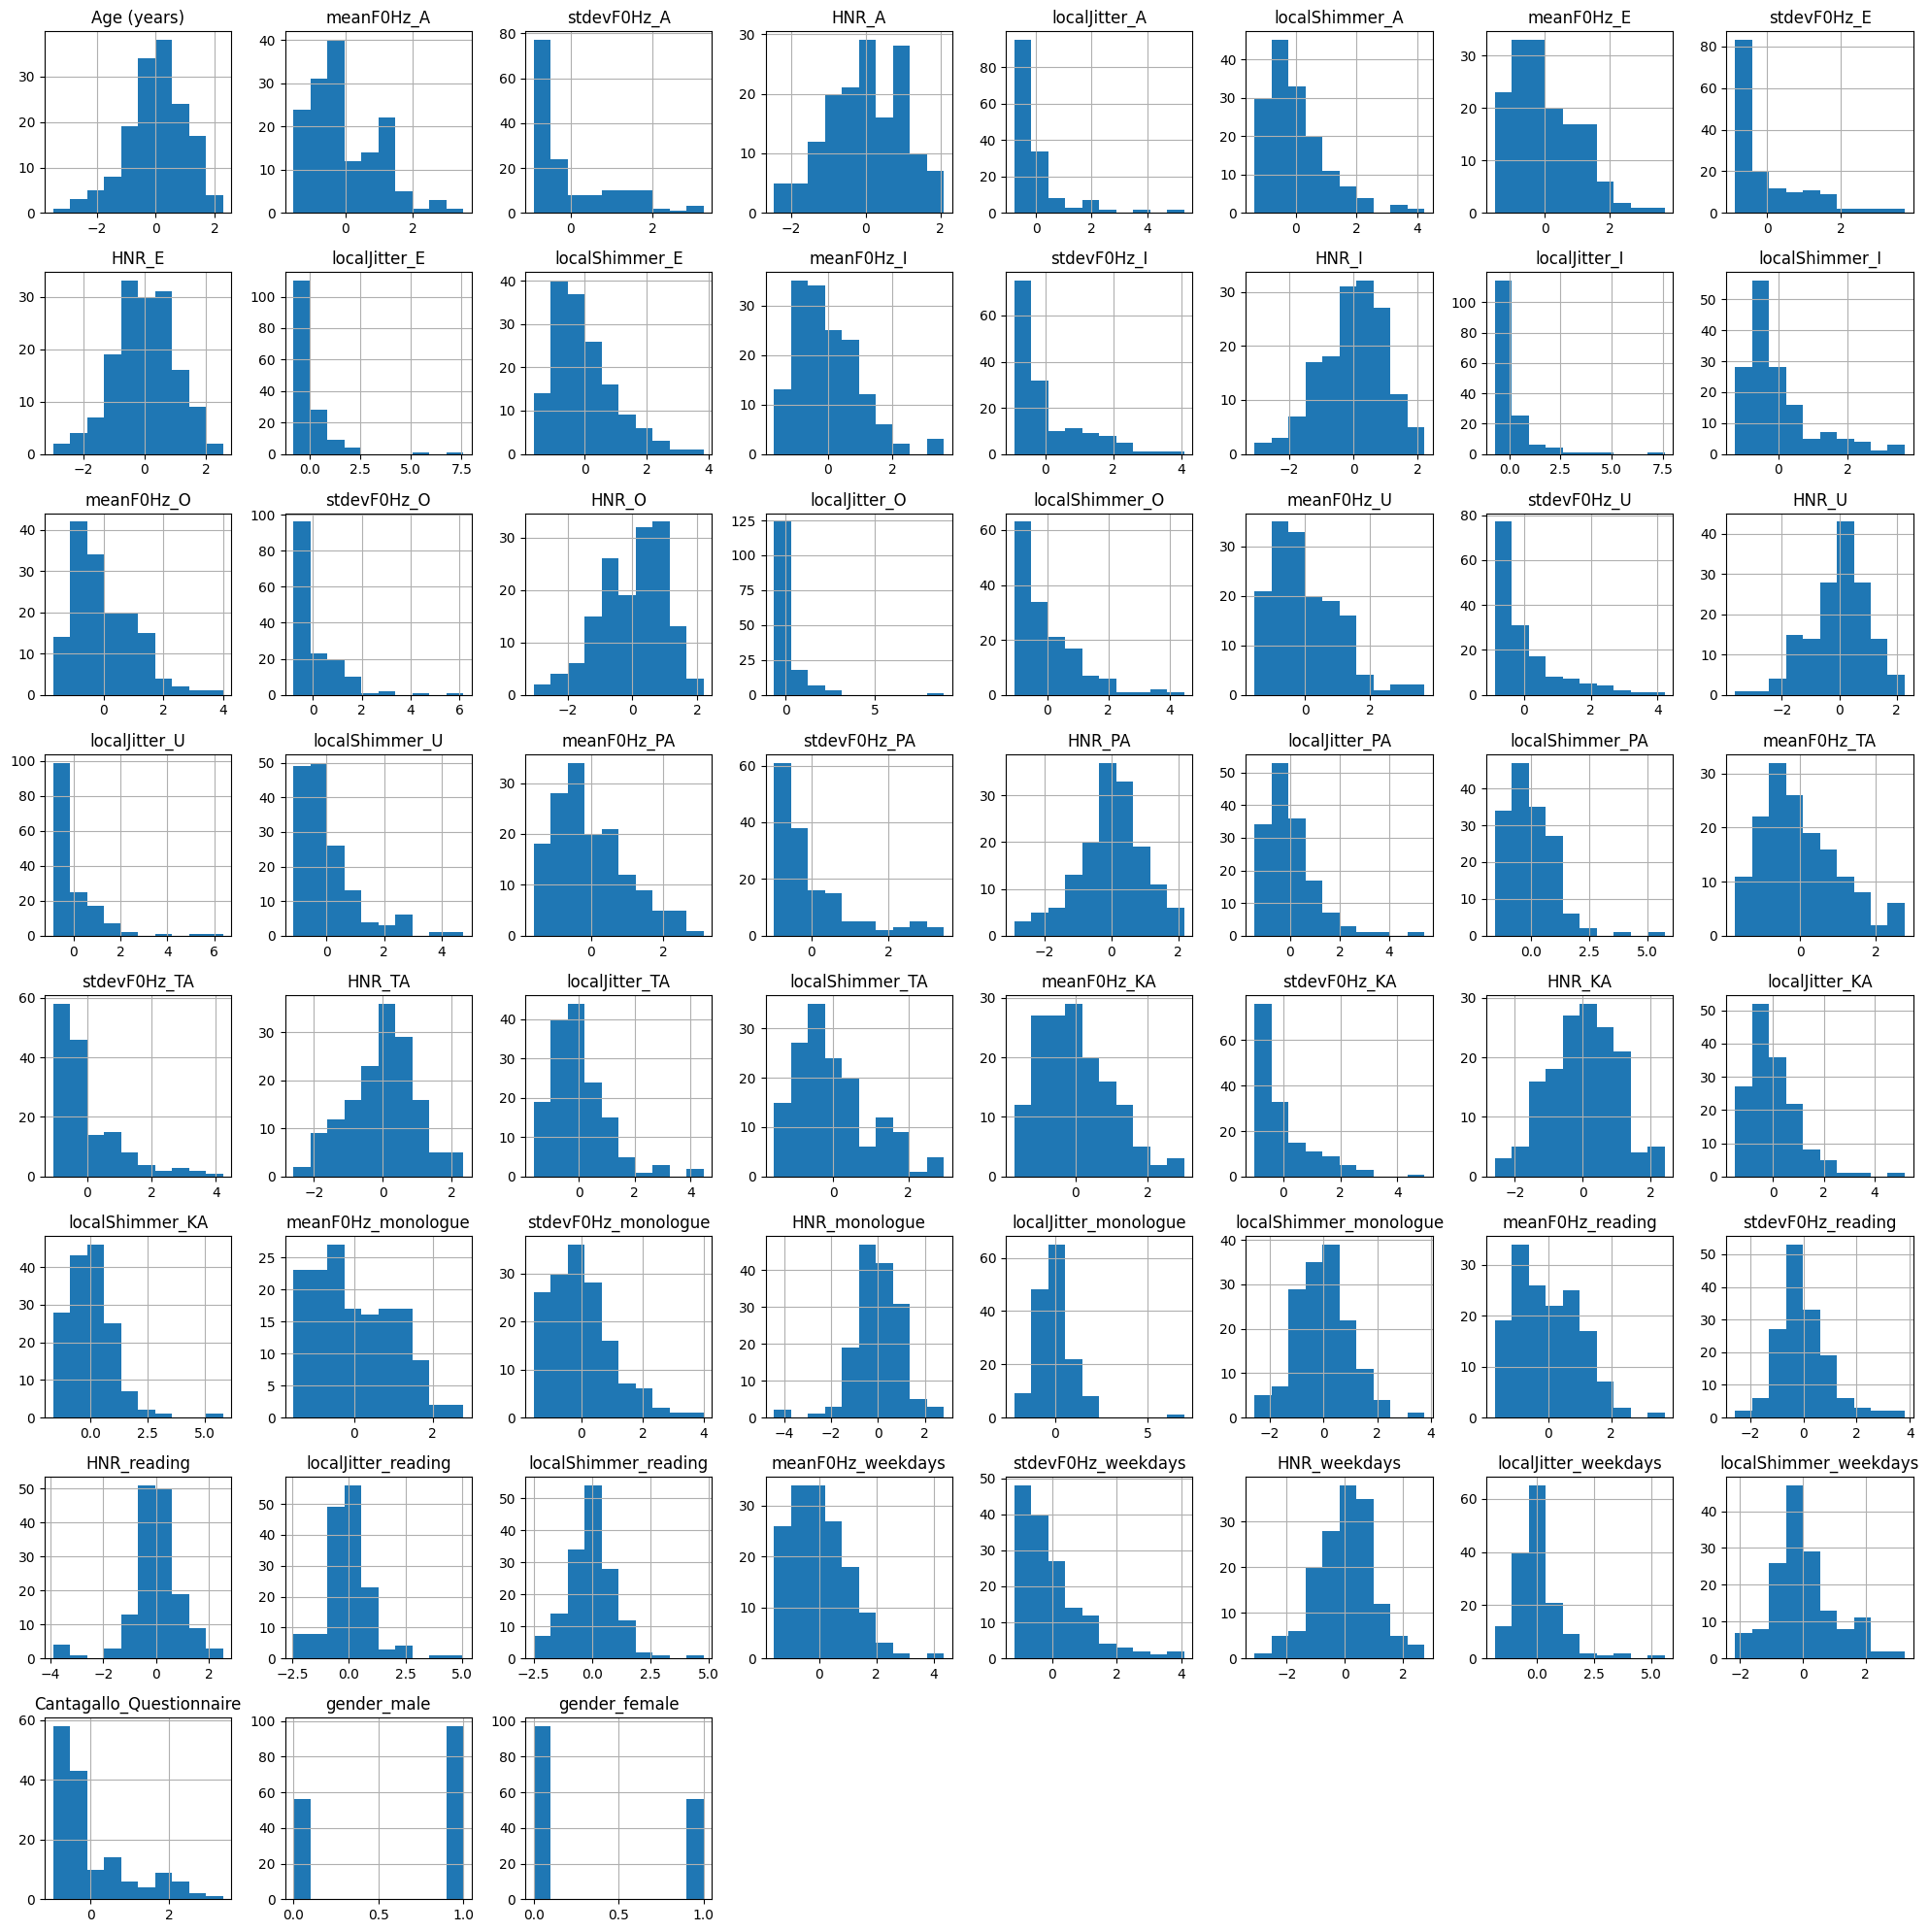

In [348]:
# do this thing again, not entirely sure why its needed dataframes are weird
for name in scaled_df.columns:
    scaled_df[name] = pd.to_numeric(scaled_df[name], errors='coerce')

scaled_df.hist(figsize=(20,20))
plt.tight_layout()

### Clean and Preprocess Function

In [349]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def prep_data(df):
    df = clean_data(df)
    df = preprocess_data(df)
    return df

def clean_data(df):
    
    # set column names as first row
    rename_map = dict([(old_name, new_name) for old_name, new_name in zip(df.axes[1], list(df.iloc[0]))])
    df = df.rename(rename_map, axis=1)

    # remove diagnostic/treatments stuff as no values for healthy participants and first row (which held the column names)
    df = pd.concat([df.iloc[:,1:4], df.iloc[:,33:]], axis=1)[1:]

    # Convert category (ALS or HC) to binary so don't have to predict a string lol
    binary_target = df["Category"] == "ALS"
    df["Category"] = binary_target

    # One-hot encode gender
    is_male = df["Sex"] == "M"
    df["gender_male"] = is_male.astype(int)
    df["gender_female"] = 1 - is_male
    df = df.drop(columns="Sex")

    # Make sure all columns are numeric so we can display them
    for name in clean_df.columns:
        clean_df[name] = pd.to_numeric(clean_df[name], errors='coerce')

    return df

def preprocess_data(df):

    # numeric features that need standardizing
    numeric_features = ["Age (years)", "meanF0Hz_A", "stdevF0Hz_A", "HNR_A", "localJitter_A", "localShimmer_A", "meanF0Hz_E", "stdevF0Hz_E", "HNR_E", "localJitter_E", "localShimmer_E", "meanF0Hz_I", "stdevF0Hz_I", "HNR_I", "localJitter_I", "localShimmer_I", "meanF0Hz_O", "stdevF0Hz_O", "HNR_O", "localJitter_O", "localShimmer_O", "meanF0Hz_U", "stdevF0Hz_U", "HNR_U", "localJitter_U", "localShimmer_U", "meanF0Hz_PA", "stdevF0Hz_PA", "HNR_PA", "localJitter_PA", "localShimmer_PA", "meanF0Hz_TA", "stdevF0Hz_TA", "HNR_TA", "localJitter_TA", "localShimmer_TA", "meanF0Hz_KA", "stdevF0Hz_KA", "HNR_KA", "localJitter_KA", "localShimmer_KA", "meanF0Hz_monologue", "stdevF0Hz_monologue", "HNR_monologue", "localJitter_monologue", "localShimmer_monologue", "meanF0Hz_reading", "stdevF0Hz_reading", "HNR_reading", "localJitter_reading", "localShimmer_reading", "meanF0Hz_weekdays", "stdevF0Hz_weekdays", "HNR_weekdays", "localJitter_weekdays", "localShimmer_weekdays", "Cantagallo_Questionnaire"]  # numerical columns
    onehot_features = ["Category", 'gender_male', 'gender_female'] # no touchy

    # standardize numeric features (not ALS diagnosis, or one hot encoded gender)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', 'passthrough', onehot_features)  # passthrough = no touchy
        ]
    )

    p = Pipeline(steps=[
        ('preprocessor', preprocessor)])

    scaled_data = p.fit_transform(df)

    # Convert back to DataFrame
    all_feature_names = numeric_features + onehot_features
    df = pd.DataFrame(scaled_data, columns=all_feature_names, index=df.index)

    # Make everything numeric
    for name in df.columns:
        df[name] = pd.to_numeric(df[name], errors='coerce')

    return df

df = prep_data(pd.read_excel('VOC-ALS-CLEANED.xlsx'))
df.head()

,Age (years),meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,HNR_E,localJitter_E,...,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire,Category,gender_male,gender_female
1,-0.596545,0.780900,-0.854556,0.112354,-0.586274,1.340078,0.864894,-0.639528,-0.397213,-0.497281,...,0.251266,0.526677,-0.498159,0.134135,-0.752233,0.237306,-0.712214,False,0,1
2,0.799575,0.943590,-0.677661,1.474616,-0.658861,-0.793134,0.814170,-0.546830,1.355740,-0.601093,...,-1.561406,1.257791,0.343883,1.970252,-1.514839,-1.727805,-0.944415,False,0,1
3,-0.247515,-0.245186,-0.674186,-0.648526,-0.186461,-0.562193,-0.738366,-0.406278,-2.032928,1.909601,...,-0.970929,-0.468445,-0.617694,0.757799,-0.149436,-0.801535,-0.214640,False,0,1
4,0.101515,1.049131,0.518163,0.449962,-0.464083,0.167784,0.425198,1.272075,0.532107,-0.530237,...,0.276340,1.279800,-0.446608,0.232726,0.399517,0.587947,-0.546356,False,0,1
5,-0.073000,0.925208,0.064061,1.160927,-0.259407,-0.673165,1.179024,-0.737717,0.627439,-0.576983,...,-0.165096,0.961817,0.680624,-0.024464,0.637189,0.645913,-0.844900,False,0,1


### Recursive Elimination with Cross Validation

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from tqdm import tqdm
import numpy as np

# class rfe:
#     def __init__(self, scoring='f1', cv_splits=3, max_iter=1000, solver='liblinear', n_jobs=-1):
#         self.model = LogisticRegression(max_iter=max_iter, solver=solver)
#         self.cv = StratifiedKFold(n_splits=cv_splits)
#         self.rfecv = RFECV(
#             estimator=self.model,
#             step=2,
#             cv=self.cv,
#             scoring=scoring,
#             n_jobs=n_jobs,
#             min_features_to_select=10
#         )
#         self.support_mask = None
#         self.ranking = None
#         self.n_features_ = None
class rfe:
    def __init__(self, scoring='f1', cv=None, max_iter=1000, solver='liblinear', n_jobs=-1):
        self.model = LogisticRegression(max_iter=max_iter, solver=solver)
        self.cv = cv if cv is not None else StratifiedKFold(n_splits=3)

        self.rfecv = RFECV(
            estimator=self.model,
            step=2,
            cv=self.cv,
            scoring=scoring,
            n_jobs=n_jobs,
            min_features_to_select=10
        )
        self.support_mask = None
        self.ranking = None
        self.n_features = None

    def fit(self, X, y):
        self.rfecv.fit(X, y)
        self.support_mask = self.rfecv.support_
        self.ranking = self.rfecv.ranking_
        self.n_features_ = self.rfecv.n_features_

    def transform(self, X):
        return self.rfecv.transform(X)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def get_support(self):
        return self.support_mask

    def get_ranking(self):
        return self.ranking

    def get_n_features(self):
        return self.n_features_

In [351]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# data = (train, test)
# target = (train, test)
def fitness_function(mask, train_X, test_X, train_y, test_y):
    selected_cols = train_X.columns[mask]
    if len(selected_cols) == 0:
        return 0
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    model.fit(train_X[selected_cols], train_y)
    preds = model.predict(test_X[selected_cols])
    return f1_score(test_y, preds)

### Testing

In [352]:
# Split data into training, testing, and validation sets with a 60/20/20 split
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)
test_set, val_set = train_test_split(test_set, test_size=0.5, random_state=42)

train_X = train_set.drop(columns="Category")
train_y = train_set["Category"]

test_X = test_set.drop(columns="Category")
test_y = test_set["Category"]

val_X = val_set.drop(columns="Category")
val_y = val_set["Category"]

print(train_X.shape)
print(test_X.shape)
print(val_X.shape)

(91, 59)
(31, 59)
(31, 59)


In [353]:
train_y.head()

149     True
29     False
41     False
96      True
26     False
Name: Category, dtype: bool

In [354]:
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

# Initialize RFECV-based selector
selector = rfe(scoring='f1')
X_train_selected = selector.fit_transform(train_X, train_y)
X_test_selected = selector.transform(test_X)

# Save feature mask and count
encoding = selector.get_support()
encoding_int = encoding.astype(int)
weight = selector.get_n_features()

# Extract real RFECV CV scores
best_fitness_over_time = selector.rfecv.cv_results_['mean_test_score']
n_iters = len(best_fitness_over_time)

# Simulate "average fitness" using random subsets
avg_fitness_over_time = []
for _ in tqdm(range(n_iters)):
    mask = np.random.rand(train_X.shape[1]) > 0.3
    if not np.any(mask):
        avg_fitness_over_time.append(0)
        continue
    X_train_tmp = train_X.loc[:, mask]
    X_val_tmp = val_X.loc[:, mask]

    model_tmp = LogisticRegression(max_iter=1000, solver='liblinear')
    model_tmp.fit(X_train_tmp, train_y)
    y_pred_tmp = model_tmp.predict(X_val_tmp)

    avg_fitness_over_time.append(f1_score(val_y, y_pred_tmp))

100%|██████████| 26/26 [00:00<00:00, 168.62it/s]


[1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1]
33


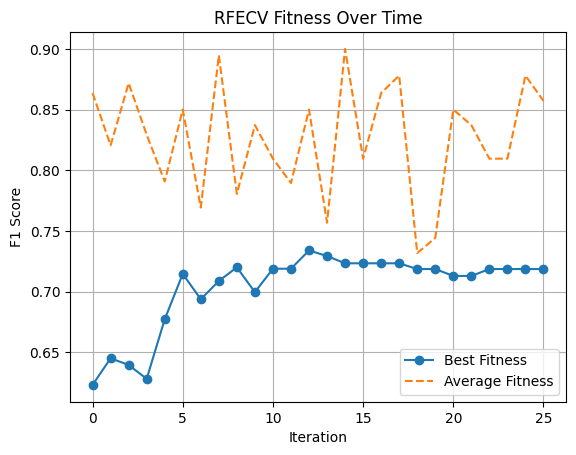

In [355]:
# Display RFECV results
print(encoding_int)
print(weight)

plt.plot(best_fitness_over_time, label="Best Fitness", marker='o')
plt.plot(avg_fitness_over_time, label="Average Fitness", linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.title("RFECV Fitness Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [356]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, fbeta_score
selected_features = train_X.columns[encoding_int]

model = LogisticRegression(random_state=42)
model.fit(train_X[selected_features], train_y)

preds = model.predict(test_X[selected_features])
f1 = f1_score(test_y, preds)

tn, fp, fn, tp = confusion_matrix(test_y, preds).ravel()
precision = precision_score(test_y, preds)
recall = recall_score(test_y, preds)
f2_score = fbeta_score(test_y, preds, beta=2)

print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")
print(f"F2 Score:  {f2_score:.4f}")

TP: 20, FP: 11, TN: 0, FN: 0
Precision: 0.645, Recall: 1.000
F2 Score:  0.9009


In [357]:
selected_features = train_X.columns[np.array(encoding_int, dtype=bool)].tolist()
num_selected_features = len(selected_features)

results = pd.DataFrame({
    "Method": ["RFECV"],
    "F1 Score": [f1],
    "Number of Features": [num_selected_features],
    "Selected Features": [selected_features]
})

print(results.to_string(index=False))

Method  F1 Score  Number of Features                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Selected Features
 RFECV  0.784314                  33 [Age (years), meanF0Hz_A, stdevF0Hz_A, HNR_A, meanF0Hz_E, HNR_E, localShimmer_E, meanF0Hz_I, stdevF0Hz_I, HNR_I, localJitter_I, stdevF0Hz_O, localJitter_O, localShimmer_O, stdevF0Hz_U, localJitter_U, meanF0Hz_PA, HNR_PA, stdevF0Hz_TA, stdevF0Hz_KA, localJitter_KA, localShimmer_KA, meanF0Hz_monologue, HNR_monologue, meanF0Hz_reading, stdevF0Hz_reading, localJitter_reading, localShimmer_reading, meanF0Hz_weekdays, HNR_weekdays, Cantagallo_Q

In [358]:
# Test encoding on validation set
fitness_function(encoding_int, train_X, val_X, train_y, val_y)

0.7843137254901961

### Random Dummy

In [359]:
# test n random encodings and return the one with the best fitness
def evaluate_feature_subset(mask, train_X, test_X, train_y, test_y):
    selected_cols = train_X.columns[mask]
    if len(selected_cols) == 0:
        return 0
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    model.fit(train_X[selected_cols], train_y)
    preds = model.predict(test_X[selected_cols])
    return f1_score(test_y, preds)
    
def random_dummy(n, train_X, test_X, train_y, test_y):
    n_features = train_X.shape[1]
    individuals = np.random.randint(0, 2, (n, n_features)).astype(bool)
    scores = [evaluate_feature_subset(mask, train_X, test_X, train_y, test_y) for mask in individuals]
    idx = np.argmax(scores)
    return individuals[idx], scores[idx]

In [360]:
dummy_encoding, dummy_score = random_dummy(500, train_X, test_X, train_y, test_y)
selected_random_features = train_X.columns[dummy_encoding].tolist()
dummy_encoding_int = dummy_encoding.astype(int)

print("Best Random Encoding (Boolean Mask):")
print(dummy_encoding_int)

print("\nSelected Feature Names:")
print(selected_random_features)

print("\nBest F1 Score from Random Subsets:")
print(f"{dummy_score:.4f}")

Best Random Encoding (Boolean Mask):
[0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0
 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1]

Selected Feature Names:
['stdevF0Hz_A', 'localJitter_A', 'localShimmer_A', 'meanF0Hz_E', 'localJitter_E', 'localJitter_I', 'HNR_O', 'localJitter_O', 'localShimmer_O', 'stdevF0Hz_U', 'localShimmer_U', 'meanF0Hz_PA', 'stdevF0Hz_PA', 'localJitter_PA', 'localShimmer_PA', 'stdevF0Hz_TA', 'HNR_TA', 'localJitter_TA', 'stdevF0Hz_KA', 'HNR_KA', 'localJitter_KA', 'stdevF0Hz_monologue', 'meanF0Hz_reading', 'HNR_reading', 'localJitter_reading', 'meanF0Hz_weekdays', 'HNR_weekdays', 'localShimmer_weekdays', 'Cantagallo_Questionnaire', 'gender_female']

Best F1 Score from Random Subsets:
0.8205


In [361]:
# Test encoding on validation set
val_score_dummy = evaluate_feature_subset(
    dummy_encoding_int, train_X, val_X, train_y, val_y
)
print("Validation F1 Score (Random Dummy):", val_score_dummy)

Validation F1 Score (Random Dummy): 0.7843137254901961


### Repeated Tests

In [362]:
n = 10
rfecv_weights = []
random_weights = []

rfecv_num_features = []
random_num_features = []

tp_list, fp_list, tn_list, fn_list = [], [], [], []
precision_list, recall_list, f2_list = [], [], []

from sklearn.model_selection import train_test_split

# x = renamed_df.drop("Category", axis=1)
# y = renamed_df["Category"]


# for i in range(n):
#     # Resplit your full dataset X, y each time
#     train_X, val_X, train_y, val_y = train_test_split(x, y, test_size=0.2, stratify=y, random_state=i)

#     # Feature selection with RFE
#     selector = rfe(scoring='f1')
#     X_train_selected = selector.fit_transform(train_X, train_y)
#     X_val_selected = selector.transform(val_X)

#     encoding = selector.get_support()
#     encoding_int = encoding.astype(int)

#     # Train model and evaluate
#     model = LogisticRegression(max_iter=1000, solver='liblinear')
#     model.fit(X_train_selected, train_y)
#     y_pred = model.predict(X_val_selected)
#     f1 = f1_score(val_y, y_pred)

#     # Save metrics
#     rfecv_weights.append(f1)
#     rfecv_num_features.append(np.sum(encoding_int))

#     tn, fp, fn, tp = confusion_matrix(val_y, y_pred).ravel()
#     precision = precision_score(val_y, y_pred, zero_division=0)
#     recall = recall_score(val_y, y_pred, zero_division=0)
#     f2 = (5 * precision * recall) / (4 * precision + recall + 1e-10)

#     tp_list.append(tp)
#     fp_list.append(fp)
#     tn_list.append(tn)
#     fn_list.append(fn)
#     precision_list.append(precision)
#     recall_list.append(recall)
#     f2_list.append(f2)

# With custom CV
#my_rfe = rfe(cv=StratifiedKFold(5))
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(0, 10000))


# Or without CV (defaults to 3-fold StratifiedKFold)
my_rfe = rfe()

# RFECV
for i in range(n):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(0, 10000))
    selector = rfe(scoring='f1', cv=cv)
    #selector = rfe(scoring='f1')
    X_train_selected = selector.fit_transform(train_X, train_y)
    X_val_selected = selector.transform(val_X)
    
    encoding = selector.get_support()
    encoding_int = encoding.astype(int)
    
    # append score on validation set
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    model.fit(X_train_selected, train_y)
    y_pred = model.predict(X_val_selected)
    f1 = f1_score(val_y, y_pred)

    rfecv_weights.append(f1)
    rfecv_num_features.append(np.sum(encoding_int))

    tn, fp, fn, tp = confusion_matrix(val_y, y_pred).ravel()
    precision = precision_score(val_y, y_pred, zero_division=0)
    recall = recall_score(val_y, y_pred, zero_division=0)
    f2 = (5 * precision * recall) / (4 * precision + recall + 1e-10)

    tp_list.append(tp)
    fp_list.append(fp)
    tn_list.append(tn)
    fn_list.append(fn)
    precision_list.append(precision)
    recall_list.append(recall)
    f2_list.append(f2)

# Random dummy
total_individuals = selector.rfecv.cv.get_n_splits() * len(selector.rfecv.cv_results_['mean_test_score'])  
for i in range(n):
    dummy_encoding, _ = random_dummy(
        total_individuals, train_X, test_X, train_y, test_y
    )

    dummy_weight = evaluate_feature_subset(
        dummy_encoding, train_X, val_X, train_y, val_y
    )

    random_weights.append(dummy_weight)
    random_num_features.append(np.sum(dummy_encoding))

RFECV average F1: 0.8161
Random Dummy average F1: 0.8137
RFECV F1 scores: [0.8947368421052632, 0.8, 0.85, 0.7391304347826086, 0.8292682926829268, 0.8717948717948718, 0.8717948717948718, 0.782608695652174, 0.782608695652174, 0.7391304347826086]
Random Dummy F1 scores: [0.8444444444444444, 0.7804878048780488, 0.8, 0.8571428571428571, 0.782608695652174, 0.8372093023255814, 0.8636363636363636, 0.7272727272727273, 0.8, 0.8444444444444444]
RFECV number of features: [np.int64(37), np.int64(23), np.int64(27), np.int64(11), np.int64(15), np.int64(51), np.int64(29), np.int64(13), np.int64(13), np.int64(10)]
Random Dummy number of features: [np.int64(26), np.int64(25), np.int64(30), np.int64(27), np.int64(31), np.int64(29), np.int64(29), np.int64(23), np.int64(33), np.int64(32)]
RFECV TP: [np.int64(17), np.int64(16), np.int64(17), np.int64(17), np.int64(17), np.int64(17), np.int64(17), np.int64(18), np.int64(18), np.int64(17)]
RFECV FP: [np.int64(1), np.int64(4), np.int64(3), np.int64(9), np.int6

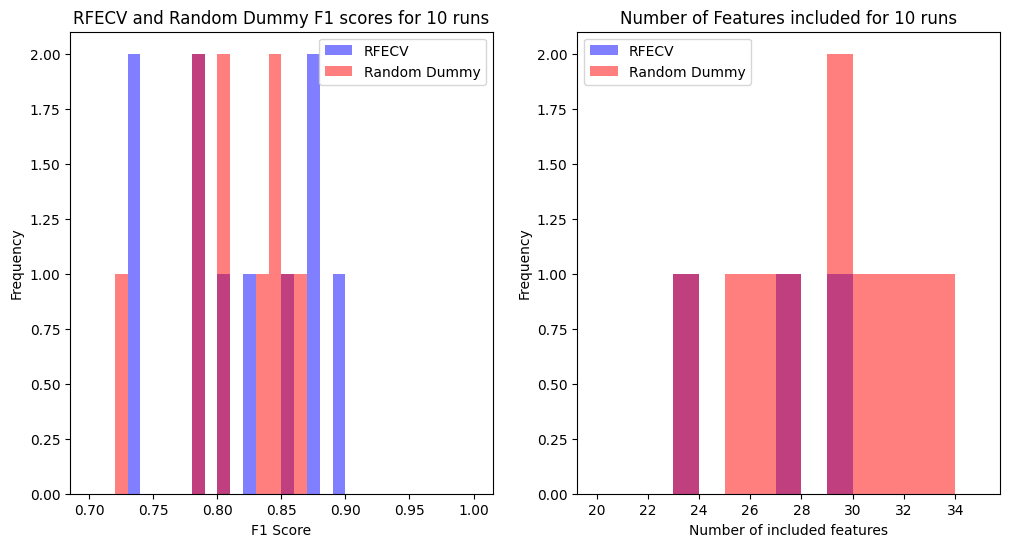

In [363]:
# Display results from n runs
print(f"RFECV average F1: {np.mean(rfecv_weights):.4f}")
print(f"Random Dummy average F1: {np.mean(random_weights):.4f}")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

print("RFECV F1 scores:", rfecv_weights)
print("Random Dummy F1 scores:", random_weights)
print("RFECV number of features:", rfecv_num_features)
print("Random Dummy number of features:", random_num_features)

print("RFECV TP:", tp_list)
print("RFECV FP:", fp_list)
print("RFECV TN:", tn_list)
print("RFECV FN:", fn_list)
print("RFECV Precision:", [round(p, 3) for p in precision_list])
print("RFECV Recall:", [round(r, 3) for r in recall_list])
print("RFECV F2 scores:", [round(f, 4) for f in f2_list])

# F1 Score plot
axs[0].hist(rfecv_weights, color="blue", label="RFECV", alpha=0.5, bins=30, range=(0.7, 1.0))
axs[0].hist(random_weights, color="red", label="Random Dummy", alpha=0.5, bins=30, range=(0.7, 1.0))
axs[0].set_xlabel("F1 Score")
axs[0].set_ylabel("Frequency")
axs[0].set_title(f"RFECV and Random Dummy F1 scores for {n} runs")
axs[0].legend()

# Number of features plot
axs[1].hist(rfecv_num_features, color="blue", label="RFECV", alpha=0.5, bins=15, range=(20, 35))
axs[1].hist(random_num_features, color="red", label="Random Dummy", alpha=0.5, bins=15, range=(20, 35))
axs[1].set_xlabel("Number of included features")
axs[1].set_ylabel("Frequency")
axs[1].set_title(f"Number of Features included for {n} runs")
axs[1].legend()

### Classification Algs

In [364]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, confusion_matrix

In [365]:
selector = rfe(scoring='f1')
X_train_selected = selector.fit_transform(train_X, train_y)
X_test_selected = selector.transform(test_X)
selected_features = train_X.columns[selector.get_support()]
reg = LogisticRegression(max_iter=10000)
reg.fit(X_train_selected, train_y)
preds = reg.predict(X_test_selected)
print("Logistic Regression (RFECV features) F1 Score:", f1_score(test_y, preds))
print("Confusion Matrix:\n", confusion_matrix(test_y, preds))

Logistic Regression (RFECV features) F1 Score: 0.6666666666666666
Confusion Matrix:
 [[ 5  6]
 [ 7 13]]


In [366]:
clf = LinearSVC(random_state=0, max_iter=10000)
clf.fit(X_train_selected, train_y)
preds_svc = clf.predict(X_test_selected)

print("LinearSVC (RFECV features) F1 Score:", f1_score(test_y, preds_svc))

LinearSVC (RFECV features) F1 Score: 0.5555555555555556


In [367]:
print("\nIndividual Feature Performance:")
for i in range(train_X.shape[1]):
    feature_name = train_X.columns[i]
    reg_single = LogisticRegression(max_iter=1000, solver='liblinear')
    reg_single.fit(train_X[[feature_name]], train_y)
    preds_single = reg_single.predict(test_X[[feature_name]])
    f1 = f1_score(test_y, preds_single)
    print(f"{i} {feature_name}: {f1:.4f}")


Individual Feature Performance:
0 Age (years): 0.7843
1 meanF0Hz_A: 0.7843
2 stdevF0Hz_A: 0.7843
3 HNR_A: 0.7843
4 localJitter_A: 0.7843
5 localShimmer_A: 0.7843
6 meanF0Hz_E: 0.7843
7 stdevF0Hz_E: 0.7843
8 HNR_E: 0.7843
9 localJitter_E: 0.7843
10 localShimmer_E: 0.7843
11 meanF0Hz_I: 0.7843
12 stdevF0Hz_I: 0.7843
13 HNR_I: 0.7843
14 localJitter_I: 0.7843
15 localShimmer_I: 0.7843
16 meanF0Hz_O: 0.7843
17 stdevF0Hz_O: 0.7843
18 HNR_O: 0.7843
19 localJitter_O: 0.7843
20 localShimmer_O: 0.7843
21 meanF0Hz_U: 0.7843
22 stdevF0Hz_U: 0.7843
23 HNR_U: 0.7843
24 localJitter_U: 0.7843
25 localShimmer_U: 0.7843
26 meanF0Hz_PA: 0.7843
27 stdevF0Hz_PA: 0.7843
28 HNR_PA: 0.7843
29 localJitter_PA: 0.7843
30 localShimmer_PA: 0.7843
31 meanF0Hz_TA: 0.7843
32 stdevF0Hz_TA: 0.7843
33 HNR_TA: 0.7843
34 localJitter_TA: 0.7843
35 localShimmer_TA: 0.7843
36 meanF0Hz_KA: 0.7843
37 stdevF0Hz_KA: 0.7317
38 HNR_KA: 0.7843
39 localJitter_KA: 0.7843
40 localShimmer_KA: 0.7843
41 meanF0Hz_monologue: 0.7843
42 st